<a href="https://colab.research.google.com/github/it-ces/PUBLIC-AI/blob/main/REGRESION/LABS/Statistical_Properties_Matrix_OLS(ai_page).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
# Iván Andrés Trujillo Abella
# ivantrujillo1229@gmail.com

# Beta expected value

$$
\hat{\beta} = \left( X^{T} X \right)^{-1} X^{T} y
$$

In [40]:
mu_x1 = 100
sigma_x1 = 0.3
mu_x2 = 50
sigma_x2 = 6
mu_x3 = 15
sigma_x3 = 5
n_population <- 12000000  # if  you dont take a big number then the results not close to the theorical population this affects
#particularly the varaince of estimations.
x1 <- rnorm(n_population, mu_x1, sigma_x1) + seq(1, 100, length.out = n_population) + runif(n_population, 80, 1200)
x2 <- rnorm(n_population , mu_x2, sigma_x2) + seq(200, 365, length.out = n_population) + runif(n_population, 1, 600)
x3 <- rnorm(n_population, mu_x3, sigma_x3) + seq(800, 2345, length.out = n_population) + runif(n_population, 50, 700)

In [41]:
# Define function
f_linear <- function(b0, b1, b2, b3, x1, x2, x3, error_sigma){
  return(b0  + b1*x1 + b2*x2  + b3*x3 + rnorm(length(x1), 0, error_sigma))
}

In [42]:
# Defining the creation of data
b0 <- 120
b1 <- 13.13
b2 <- 41.87
b3 <- 61.76
error_sigma <- 20
y <- f_linear(b0= b0, b1= b1, b2= b2, b3= b3,
x1=x1,  x2 = x2,  x3 = x3, error_sigma = error_sigma)
data <- cbind(x0=1, x1,x2, x3, y)

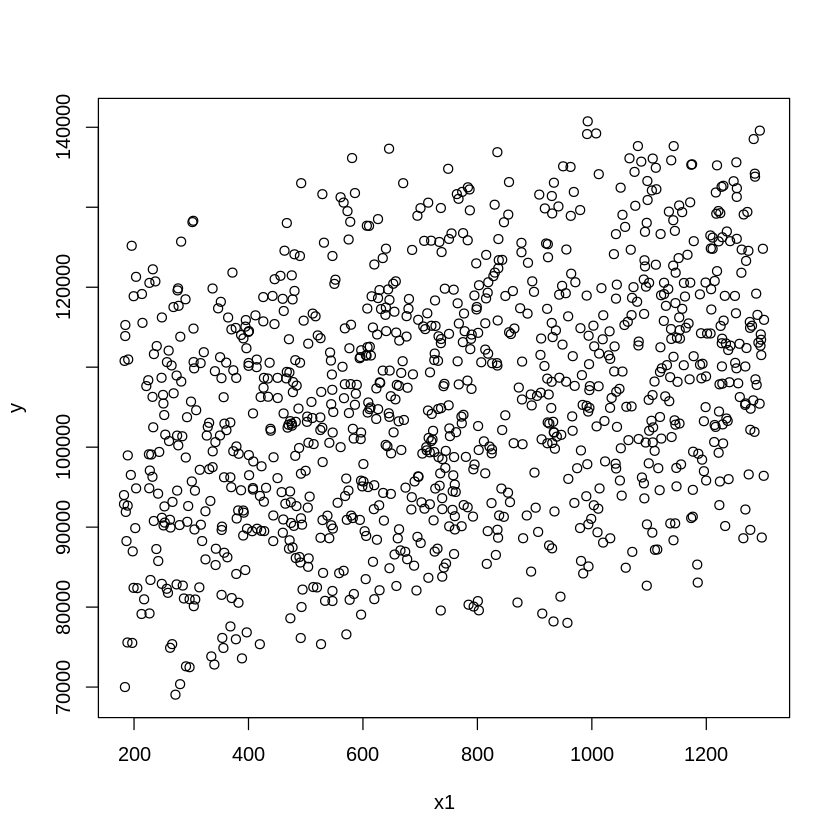

In [43]:
plot(data[1:1000, 'x1'], data[1:1000, 'y'], col = "black", pch = 1, xlab = "x1", ylab = "y")

In [44]:
betas <- function(X, y){ as.vector(solve(t(X) %*% X) %*% t(X) %*% y) }

In [45]:
trials <- 10000 # simulatons...
sample_size <- 500
estimated_betas <- list()
for ( i in 1:trials){
sampled_data <- data[sample(1:nrow(data), sample_size),]
sampled_y <- sampled_data[, 'y']
sampled_X <- sampled_data[, c('x0', 'x1', 'x2', 'x3')]
estimated_betas <- append(estimated_betas, list(betas(sampled_X, sampled_y)))
}
estimated_betas <- do.call(rbind, estimated_betas)
colMeans(estimated_betas)

[1] 120.10730  13.12997  41.86993  61.75998

In [46]:
# Error
as.vector(c(b0, b1, b2, b3)) - colMeans(estimated_betas)

[1] -1.073029e-01  3.412724e-05  6.819647e-05  2.060458e-05

In [47]:
# Variance of estimator

In [48]:
# Empirical variance of estiamted coefficients
apply(estimated_betas, MARGIN=2, var)

[1] 2.300575e+01 7.651556e-06 2.634293e-05 3.654957e-06

In [49]:
# Theorical variance
variance_betas <- diag((error_sigma^2)*solve(t(sampled_X) %*% sampled_X)) ## See the diagonal!!

In [50]:
variance_betas # This coefficients are not perfect given my population is fixed

x0           x1           x2           x3 
2.309220e+01 7.664187e-06 2.693818e-05 3.860923e-06